# 実習3.1：連番の整数を要素とする1次元配列の生成

In [1]:
import numpy as np

# 0以上10未満の整数を要素に持つ配列を生成
a=np.arange(0,10)

print(a)

[0 1 2 3 4 5 6 7 8 9]


# 実習3.2：1次元配列から2次元配列への変換

In [2]:
# 2行5列の2次元配列に変換
b=a.reshape((2,5))
print('b')
print(b)

c=a.reshape((-1,5))
print('c')
print(c)

d=a.reshape((2,-1))
print('d')
print(d)

b
[[0 1 2 3 4]
 [5 6 7 8 9]]
c
[[0 1 2 3 4]
 [5 6 7 8 9]]
d
[[0 1 2 3 4]
 [5 6 7 8 9]]


# 実習3.3：キーワード引数を使う関数呼び出し

In [3]:
def add(a,b):
    print('aの値：',a)
    print('bの値：',b)
    return a+b

# 関数の外
s1=add(a=1,b=2)
print('s1の値：',s1)

s2=add(a=2,b=1)
print('s2の値：',s2)

aの値： 1
bの値： 2
s1の値： 3
aの値： 2
bの値： 1
s2の値： 3


# グラフで2バイト文字を使うためのライブラリのインストール

In [4]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 関数 save_fig：図の保存用

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

def save_fig(plt, file_prefix):
    if file_prefix == '':
        return
    
    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches='tight', pad_inches = 0)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches = 0)

# 関数 show_data1：体温とクラスを可視化する

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

X_col = ['cornflowerblue', 'gray']
X_labels = ['非感染者(0)', '感染者(1)']

def show_data1(x, t, x0=None, file_prefix=''):
    K = np.max(t) + 1
    fig = plt.figure(figsize=(5,5))

    for k in range(K):
        plt.plot(x[t==k], t[t==k], X_col[k], alpha=0.5,
                 linestyle='none', marker='o', markersize=10, label=X_labels[k])

    plt.grid(True)
    plt.ylim(-0.5, 1.5)
    
    if x0 is not None:
        plt.plot(np.repeat(x0, 100), np.linspace(-0.5, 1.5, 100), 
                 linestyle='dashed', color='black', label=f'x={x0:.2f}')
        
    plt.xticks(fontsize=14)
    plt.xlabel('体温 (${}^{\circ}$C)', fontsize=14)
    plt.ylabel('感染状態(クラス)', fontsize=14)
    plt.yticks([0, 1], fontsize=14)
    plt.legend(fontsize=14, loc='lower right')
    plt.tight_layout()
    save_fig(plt, file_prefix=file_prefix)
    plt.show()

# 実習3.4：教師データをCSVファイルから読み込む

In [7]:
import pandas as pd

# csvファイル data3.csv の内容をデータフレームとして読み込む
# 文字コード(UTF-8)を引数encodingで指定。
df=pd.read_csv('data3.csv', encoding='utf-8')

# データフレームの内容を表示する
df

,体温,感染状態
0,37.795747,1
1,36.452328,0
2,36.352599,0
3,36.912473,1
4,37.310613,1
5,37.074323,0
6,38.326419,1
7,38.017986,1
8,36.717174,0
9,36.616666,0


# 実習3.5：データフレームの列をNumPy配列へ変換

xのデータ型： <class 'pandas.core.series.Series'>
yのデータ型： <class 'pandas.core.series.Series'>


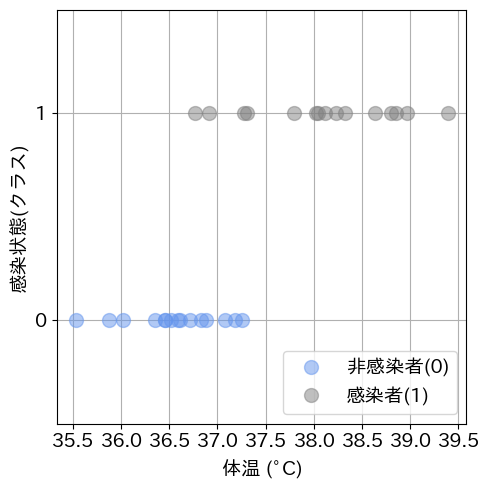

In [8]:
import numpy as np

x=df['体温'] # 体温をデータフレームから取り出す
y=df['感染状態'] # 正解クラスをデータフレームから取り出す

print('xのデータ型：', type(x))
print('yのデータ型：', type(y))

x=x.to_numpy() # データ型をNumpy配列に変換
y=y.to_numpy() # データ型をNumpy配列に変換

# 関数に体温xと正解クラスyの配列を渡して可視化する
show_data1(x,y)

# 実習3.6：データ数と配列の形状確認

In [9]:
n=len(x)
print(f'データ数：{n}')

print(f'体温の配列の形状：{x.shape}')
print(f'クラスの配列の形状：{y.shape}')

データ数：30
体温の配列の形状：(30,)
クラスの配列の形状：(30,)


# 実習3.7：ネットワークモデルの構築

In [10]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model=Sequential() # ネットワークの容れ物を作る

neuron=Dense(input_dim=1,          # 1個の入力データの成分数。今回の入力データは、1成分(体温)
             units=1,              # ニューロン数
             activation='sigmoid') # 活性化関数にシグモイド(sigmoid)を指定

# 作成したニューロンをネットワークの容れ物に追加
model.add(neuron)

# ネットワークの要約を表示
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# 実習3.8：損失関数と最適化手法の設定

In [11]:
# lose: 損失関数を指定する引数。
# binary_crossentropyは2クラス分類用の交差エントロピー誤差。
# optimizer: w0とw1の値を推定する最適化手法を指定。
# SDGは確率的勾配降下法(Stochastic Gradient Descent)の略。
# キーワード引数については実習3.3参照
model.compile(loss='binary_crossentropy',
              optimizer='SGD')

# 実習3.9：標準化なしのデータを使って学習

In [13]:
x=x.reshape(-1,1) # 学習用に2次元配列へ変換。実習3.2参照

history=model.fit(x, # ネットワークへの入力データ(標準化なしの体温)
                  y, # 正解クラスラベル
                  batch_size=len(x), # バッチサイズ
                  epochs=3000) # エポック数

ストリーミング出力は最後の 5000 行に切り捨てられました。
1/1 [==============================] - 0s 10ms/step - loss: 1.5484
Epoch 21/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.7331
Epoch 22/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.5484
Epoch 23/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.7331
Epoch 24/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.5484
Epoch 25/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.7331
Epoch 26/3000
1/1 [==============================] - 0s 9ms/step - loss: 1.5484
Epoch 27/3000
1/1 [==============================] - 0s 12ms/step - loss: 1.7331
Epoch 28/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.5484
Epoch 29/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.7331
Epoch 30/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.5484
Epoch 31/3000
1/1 [==============================] - 0s 11ms/step - loss: 1.7331
Epoch 32/3000
1/

# 実習3.10：標準化なしのデータを使い学習した場合の正解率

In [14]:
from sklearn.metrics import accuracy_score

# 学習したモデルを使い、標準化なしの体温xから感染者である条件付きを推定
y_pred=model.predict(x)

# 条件付き確立が0.5以上か、それ以外かでクラスを決定
# 実習2.15参照
c_pred=(y_pred>=0.5)*1

# 関数accuracy_scoreに正解ラベルと予測ラベルを渡して、正解率を計算
v=accuracy_score(y,c_pred)
print('正解率：',v)

1/1 [==============================] - 0s 90ms/step
正解率： 0.5


# おまけ：標準化なしのデータを使い学習した場合の決定境界

重み w0 = <tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.10145867]], dtype=float32)>
バイアス w1 = <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.31001925], dtype=float32)>
決定境界の値 = 3.0556211471557617


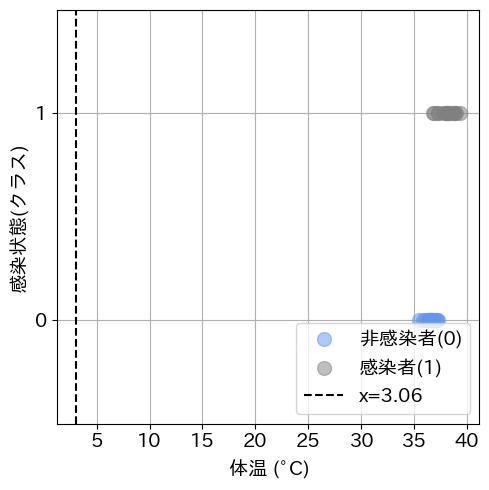

In [15]:
w0 = neuron.weights[0]
w1 = neuron.weights[1]

print(f'重み w0 = {w0}')
print(f'バイアス w1 = {w1}')

w0 = w0.numpy()[0, 0]
w1 = w1.numpy()[0]

# 決定境界x0の値を計算
x0 = -w1 / w0

print(f'決定境界の値 = {x0}')

show_data1(x, y, x0)

# 実習3.11：データの前処理（標準化）

In [16]:
m=np.mean(x) # 体温の平均を求める
s=np.std(x) # 体温の標準偏差を求める

print('xの平均:',m)
print('xの標準偏差:',s)

# 平均0、標準偏差1となるように体温データを変換
x2=(x-m)/s

xの平均: 37.326722242433014
xの標準偏差: 0.9884492106506017


# 実習3.12：標準化前後のデータ分布

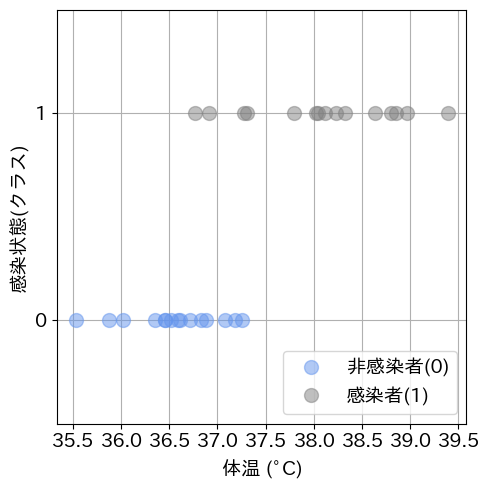

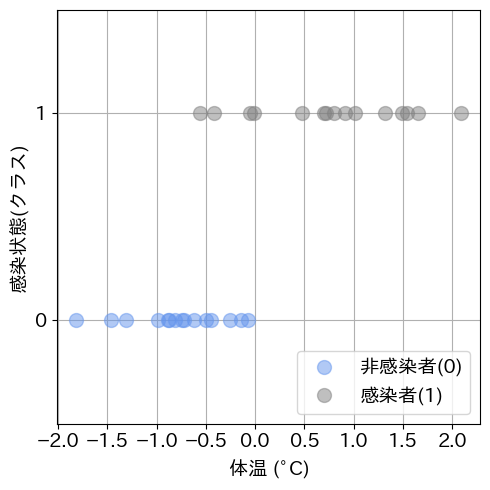

In [17]:
# 標準化なしのデータの分布を可視化
show_data1(x,y)

# 標準化ありのデータの分布を可視化
show_data1(x2,y)

# 実習3.13：ネットワークモデルの学習

In [18]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model=Sequential() # ネットワークの容れ物を作る

neuron=Dense(input_dim=1,          # 1個の入力データの成分数。今回の入力データは、1成分(体温)をもつ
             units=1,              # ニューロン数
             activation='sigmoid') # 活性化関数にシグモイド(sigmoid)を指定

# 作成したニューロンをネットワークの容れ物に追加
model.add(neuron)

model.compile(loss='binary_crossentropy',optimizer='SGD')

x2=x2.reshape(-1,1) # 学習用に2次元配列へ変換。実習3.2参照

history=model.fit(x2, # ネットワークへの入力データ(標準化ありの体温)
                  y, # 正解クラスラベル
                  batch_size=len(x2), # バッチサイズ
                  epochs=3000) # エポック数

Epoch 1/3000
1/1 [==============================] - 0s 296ms/step - loss: 0.6680
Epoch 2/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.6666
Epoch 3/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.6652
Epoch 4/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.6639
Epoch 5/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.6625
Epoch 6/3000
1/1 [==============================] - 0s 15ms/step - loss: 0.6611
Epoch 7/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.6598
Epoch 8/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6585
Epoch 9/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.6571
Epoch 10/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6558
Epoch 11/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.6545
Epoch 12/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.6532
Epoch 13/3000
1/1 [====================

# 実習3.14：標準化ありのデータを使い学習した場合の正解率

In [19]:
from sklearn.metrics import accuracy_score

# 学習したモデルを使い、標準化ありの体温x2から感染者である条件付きを推定
y_pred=model.predict(x2)

# 条件付き確立が0.5以上か、それ以外かでクラスを決定
# 実習2.15参照
c_pred=(y_pred>=0.5)*1

# 関数accuracy_scoreに正解ラベルと予測ラベルを渡して、正解率を計算
v=accuracy_score(y,c_pred)
print('正解率：',v)

1/1 [==============================] - 0s 50ms/step
正解率： 0.9


# おまけ：標準化ありのデータを使い学習した場合の決定境界

重み w0 = <tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[2.7433288]], dtype=float32)>
バイアス w1 = <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.23520185], dtype=float32)>
決定境界の値 = 37.2419766281306


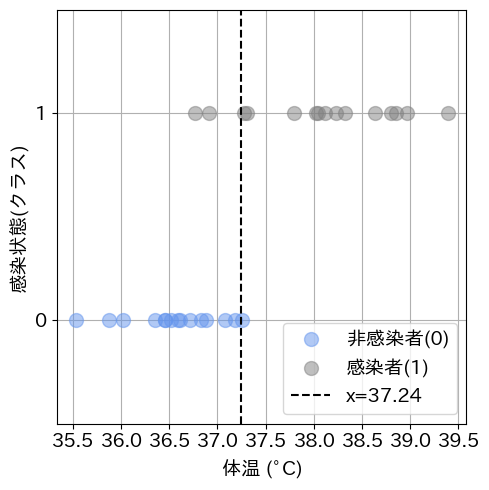

In [20]:
w0 = neuron.weights[0]
w1 = neuron.weights[1]

print(f'重み w0 = {w0}')
print(f'バイアス w1 = {w1}')

w0 = w0.numpy()[0, 0]
w1 = w1.numpy()[0]

# 決定境界x0の値を計算
x0 = -w1 / w0

# 標準化したデータでネットワークを学習させたので、元のスケールに戻す
x0 = x0 * s + m
print(f'決定境界の値 = {x0}')

show_data1(x, y, x0)